In [1]:
#imports
import csv
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline
import math

### Reading in the Data:

In [2]:
f = open('AviationData.txt','r')
csvreader = csv.reader(f, delimiter = '|')
AviationData = list(csvreader)

In [3]:
AviationData[1]

['20191123X03127 ',
 ' Accident ',
 ' GAA20CA094 ',
 ' 11/23/2019 ',
 ' Simsbury, CT ',
 ' United States ',
 ' 41.916111 ',
 ' -72.776945 ',
 ' 4B9 ',
 ' Simsbury ',
 ' Unavailable ',
 ' Substantial ',
 ' Airplane ',
 ' N5776W ',
 ' Piper ',
 ' PA28 ',
 ' No ',
 ' 1 ',
 '  ',
 ' Part 91: General Aviation ',
 '  ',
 ' Instructional ',
 '  ',
 '  ',
 '  ',
 '  ',
 '  ',
 '  ',
 '  ',
 ' Preliminary ',
 ' 11/27/2019 ',
 ' ']

In [4]:
aviation_list = []
for row in AviationData[:]:
    lst = []
    for item in row:
        lst.append(item.strip())
    aviation_list.append(lst)

In [5]:
aviation_list[:5]

[['Event Id',
  'Investigation Type',
  'Accident Number',
  'Event Date',
  'Location',
  'Country',
  'Latitude',
  'Longitude',
  'Airport Code',
  'Airport Name',
  'Injury Severity',
  'Aircraft Damage',
  'Aircraft Category',
  'Registration Number',
  'Make',
  'Model',
  'Amateur Built',
  'Number of Engines',
  'Engine Type',
  'FAR Description',
  'Schedule',
  'Purpose of Flight',
  'Air Carrier',
  'Total Fatal Injuries',
  'Total Serious Injuries',
  'Total Minor Injuries',
  'Total Uninjured',
  'Weather Condition',
  'Broad Phase of Flight',
  'Report Status',
  'Publication Date',
  ''],
 ['20191123X03127',
  'Accident',
  'GAA20CA094',
  '11/23/2019',
  'Simsbury, CT',
  'United States',
  '41.916111',
  '-72.776945',
  '4B9',
  'Simsbury',
  'Unavailable',
  'Substantial',
  'Airplane',
  'N5776W',
  'Piper',
  'PA28',
  'No',
  '1',
  '',
  'Part 91: General Aviation',
  '',
  'Instructional',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  'Preliminary',
  '11/27/2019',

In [6]:
len(aviation_list)

84172

We will now search for a code: `LAX94LA336`. We are told that this code coule be in any row or column. This means we are supposed to search through every entry one by one. This approach will be very time consuming and ineffective:

In [7]:
lax_code = []
for entry in aviation_list:
    for item in entry:
        if 'LAX94LA336' in item:
            lax_code.append(entry)

In [8]:
lax_code

[['20001218X45447',
  'Accident',
  'LAX94LA336',
  '07/19/1962',
  'BRIDGEPORT, CA',
  'United States',
  '',
  '',
  '',
  '',
  'Fatal(4)',
  'Destroyed',
  '',
  'N5069P',
  'PIPER',
  'PA24-180',
  'No',
  '1',
  'Reciprocating',
  '',
  '',
  'Personal',
  '',
  '4',
  '0',
  '0',
  '0',
  'UNK',
  'UNKNOWN',
  'Probable Cause',
  '09/19/1996',
  '']]

Even though this approach was incredibly cumbersome, the task was completed in very short time. But this algorithm was exponential time. This means in larger DataSets this search could take up a considerable ammount of time and would be very inefficient. Because the algorithm has to search through each item in each row, it has to compute $O(n^2)$ operations. This is very inefficient.

## Writing a linear time algorithm:

Even though the intuitive thing to do would be to use search the entire row, this would just mean, that python still has to search each individual element in each row. We can reduce the ammount of computations to linear time by just searching the Accident Number, where we know that the LAX code should be found. These are listed under index `2` in each row

In [9]:
lax_code = []
for row in aviation_list:
    if 'LAX94LA336' in row[2]:
        lax_code.append(row)
        
lax_code

[['20001218X45447',
  'Accident',
  'LAX94LA336',
  '07/19/1962',
  'BRIDGEPORT, CA',
  'United States',
  '',
  '',
  '',
  '',
  'Fatal(4)',
  'Destroyed',
  '',
  'N5069P',
  'PIPER',
  'PA24-180',
  'No',
  '1',
  'Reciprocating',
  '',
  '',
  'Personal',
  '',
  '4',
  '0',
  '0',
  '0',
  'UNK',
  'UNKNOWN',
  'Probable Cause',
  '09/19/1996',
  '']]

The linear time algorithm should just be faster than the exponential time one. 

## Logarithmic Time Algorithm

In the next step a logarithmic time algorithm will be constructed. In order to do this, the dataset will need to be ordered by the column we are going to search for. This is a very time consuming task and we will have to allocate additional hard drive space to the newly constructed dataset. But this is a one-time investment if we keep our newly ordered dataset and don't delete it after each search. So in cases where we are searching for information in the same column over and over again, this can be worth it. This will first be done using Pandas and later two different sorting algorithms will be constructed and tested for expense

In [10]:
acc_sort = pd.DataFrame(aviation_list[1:], columns = aviation_list[0]).sort_values('Accident Number')
acc_sort

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,...,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Status,Publication Date,
36606,20001212X20184,Accident,ANC00FA018,12/07/1999,"BETHEL, AK",United States,,,,,...,"GRANT AVIATION, INC.",6,0,0,0,IMC,CRUISE,Probable Cause,04/18/2001,
36371,20001212X20436,Accident,ANC00FA024,02/05/2000,"ILIAMNA, AK",United States,,,,,...,,6,0,0,0,UNK,CRUISE,Probable Cause,07/17/2001,
35884,20001212X20930,Accident,ANC00FA052,05/01/2000,"KOTZEBUE, AK",United States,,,,,...,,1,0,0,0,IMC,CRUISE,Probable Cause,07/10/2001,
35834,20001212X20931,Accident,ANC00FA056,05/09/2000,"ANCHORAGE, AK",United States,,,MRI,MERRILL FIELD,...,,0,0,0,2,VMC,DESCENT,Probable Cause,07/10/2001,
35529,20001212X21133,Accident,ANC00FA076,06/22/2000,"TUNTUTULIAK, AK",United States,,,AK61,TUNTUTULIAK,...,,1,1,0,0,VMC,TAKEOFF,Probable Cause,07/10/2001,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,20191007X02421,Accident,WPR20WA003,10/06/2019,"Sultanpur, India",India,,,,,...,,2,,,,,,Foreign,,
142,20191009X41754,Accident,WPR20WA006,10/06/2019,"Huhudi, South Africa",South Africa,,,,,...,,1,1,,,,UNKNOWN,Foreign,,
124,20191022X82728,Accident,WPR20WA010,10/11/2019,"Port Said City, Egypt",Egypt,32.956944,32.303889,,,...,,,,,5,,MANEUVERING,Foreign,,
106,20191022X83614,Accident,WPR20WA011,10/15/2019,"Singapore, Singapore",Singapore,,,,,...,,,,,1,,TAKEOFF,Foreign,,


## The sorting Algorithm:

First an inefficient sorting algorithm will be made:
first an empty list `newer_sort` is created. The sorted items will be added to this list in the correct order

This algorithm will look at each item in each list in `aviation_list`. It will then:

1. check if the list of sorted items is empty and if so append the item
2. check if the item is larger than the largest item currently in the list and append if so
3. check if the item is smaller than the min in the list and add item at the beginning if so
4. if none of these apply, the item has to be added somewhere in between. another algorithm is then used that looks through every single item in the sorted list until it finds two adjacent items where one is smaller than the item to add and one is larger. The new item is then added in between these two

The whole function is also timed, to be able to evaluate its efficiency.

In [11]:
def inef_sort(nr):
    aviation_list_copy = aviation_list
    t0 = time.time()    
    newer_sort = []
    for item in aviation_list_copy[:nr]:
        # for first item
        if len(newer_sort)==0:
            newer_sort.append(item)
        # for items higher or lower than the maximum, minimum in list
        elif item[2] > newer_sort[-1][2]:
            newer_sort.append(item)
        elif item[2] < newer_sort[0][2]:
            newer_sort.insert(0, item)
        # All items in the middle
        else:
            i = 0
            for entry in newer_sort:
                if item[2] > entry[2]:
                    i += 1
            newer_sort.insert(i, item)
#             print('middle')
#             print(newer_sort)
    dt = time.time()-t0
    return dt, newer_sort

This algorithm is very inefficient, for every newly added item it checks every item in the list, that is lower than the item we added. This means that the longer the list the higher the time. We would expect this algorithm to be exponential time

In [12]:
print(inef_sort(2000)[0])

0.18480968475341797


In [13]:
ns1 = []
ts1 = []
for item in [10,20,30,40,50,100,500,1000, 2000, 3000, 4000, 5000, 10000]:
    ns1.append(item)
    ts1.append(inef_sort(item)[0])
    

In [14]:
print(ns1)
print(ts1)

[10, 20, 30, 40, 50, 100, 500, 1000, 2000, 3000, 4000, 5000, 10000]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.011987447738647461, 0.04295468330383301, 0.17382192611694336, 0.40458035469055176, 0.7592165470123291, 1.2297320365905762, 6.210590839385986]


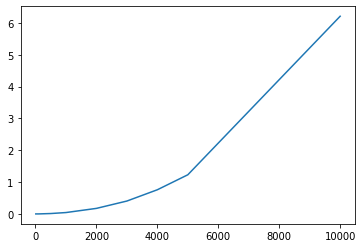

In [15]:
plt.plot(ns1,ts1)

so it looks like the current sorting algorithm is exponential time. This is obviously not ideal. We can probably replace the inner loop that looks for the place to put the current item, which is linear time with one that is logarithmic time. This should improve our performance significantly.

## More Efficient Sorting Algorithm:

This new algorithm will be added to our sorting function for the case where the new item needs to be added where it has two neighbors.

It will:

1. Find the middle of our list of already sorted items
2. Check whether the item in the middle of the list is larger or smaller than our new item
3. In either case find out if the middle of the list is the right place to put the item and insert accordingly and end the function
4. If the item in the middle of our sorted list is larger than our new item, the algorithm will cut out all items from the list larger than the middle index and call the function again with the newly cut list. The recursion will continue until the right place for our new item is found
5. If the item in the middle is smaller than our new item, the algorithm will cut our the upper half of the list and call itself again. The algorithm will reccur until thr right place for our new item is found

This new sorting algorithm should improve the efficiency of our sorting algorithm

In [16]:
lst = list(range(15))
n = 5.5
lower = 0
upper = len(lst)
def find_place(n, lower, upper):
    ind = math.floor((upper + lower) / 2)
    if n < lst[ind]:
        if n > lst[ind-1]:
            lst.insert(ind, n)
        else:
            upper = ind
            find_place(n, lower, upper)
    if n > lst[ind]:
        if n < lst[ind + 1]:
            lst.insert(ind + 1, n)
        else:
            lower = ind
            find_place(n, lower, upper)
find_place(13.7, 0 , len(lst))
lst

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 13.7, 14]

We need to slightly modify this sorting algorithm, because it uses the items of a list to sort instead of a subitem of an item, which is what we need if we want to sort our list by the accident number that has index

In [17]:
def find_place(lst, n, lower, upper):
    ind = math.floor((upper + lower) / 2)
    if n[2] < lst[ind][2]:
        if n[2] > lst[ind-1][2]:
            lst.insert(ind, n)
        else:
            upper = ind
            find_place(lst, n, lower, upper)
    if n[2] > lst[ind][2]:
        if n[2] < lst[ind + 1][2]:
            lst.insert(ind + 1, n)
        else:
            lower = ind
            find_place(lst, n, lower, upper)

This sorting algorithm is logarithmic time and should improve the performance of the complete sorting algorithm.

In [18]:
np.random.seed(0)
random_list = []
# for ind in inds:
#     random_list.append(aviation_list[ind][2])
def more_ef_sort(nr):
    aviation_list_copy = aviation_list
    t0 = time.time()    
    newer_sort = []
    for item in aviation_list_copy[:nr]:
        if len(newer_sort)==0:
            newer_sort.append(item)
#             print('first entry')
#             print(newer_sort)
        elif item[2] > newer_sort[-1][2]:
            newer_sort.append(item)
#             print('highest')
#             print(newer_sort)
        elif item[2] < newer_sort[0][2]:
            newer_sort.insert(0, item)
#             print('lowest')
#             print(newer_sort)
        else:
            find_place(newer_sort, item, 0, len(newer_sort))
    dt = time.time()-t0
    return dt, newer_sort

In [19]:
ns2 = []
ts2 = []
for item in [10,20,30,40,50,100,500,1000, 2000, 3000, 4000, 5000, 10000, 20000, 30000, 40000, 50000, len(aviation_list)]:
    ns2.append(item)
    ts2.append(more_ef_sort(item)[0])
    

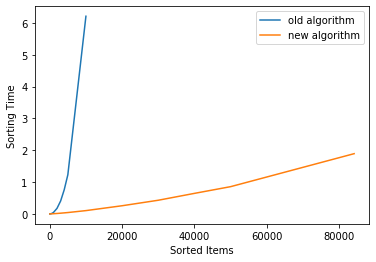

In [20]:
plt.plot(ns1,ts1, label = 'old algorithm')
plt.plot(ns2,ts2, label = 'new algorithm')
plt.legend()
plt.xlabel('Sorted Items')
plt.ylabel('Sorting Time')
plt.show()

let's see if the algorithms do the same thing

In [39]:
import pandas as pd
print(inef_sort(10000)[0])

6.0387678146362305


In [21]:
inef_sort(10000)[1] == more_ef_sort(10000)[1]

True

The performance improvement of this algorithm over the original is astonishing. We could make it even faster, but for the current project with only 85000 rows, this is very good.

## Logarithmic Search Algorithm

As discussed earlier, the problem with a logarithmic search algorithm is that the data needs to be ordered in respect to the column we are searching, but with the new sorting algorithm this task is actually not very expensive. We can now write a searching algorithm analogously to the one we used in the sorting algorithm.

In [22]:
sorted_avlst = more_ef_sort(len(aviation_list))[1]
sorted_avlst[:5]

[['20001212X20184',
  'Accident',
  'ANC00FA018',
  '12/07/1999',
  'BETHEL, AK',
  'United States',
  '',
  '',
  '',
  '',
  'Fatal(6)',
  'Destroyed',
  '',
  'N1747U',
  'Cessna',
  '207',
  'No',
  '1',
  'Reciprocating',
  '',
  'SCHD',
  'Unknown',
  'GRANT AVIATION, INC.',
  '6',
  '0',
  '0',
  '0',
  'IMC',
  'CRUISE',
  'Probable Cause',
  '04/18/2001',
  ''],
 ['20001212X20436',
  'Accident',
  'ANC00FA024',
  '02/05/2000',
  'ILIAMNA, AK',
  'United States',
  '',
  '',
  '',
  '',
  'Fatal(6)',
  'Destroyed',
  '',
  'N756HG',
  'Cessna',
  'U206G',
  'No',
  '1',
  'Reciprocating',
  '',
  'NSCH',
  'Unknown',
  '',
  '6',
  '0',
  '0',
  '0',
  'UNK',
  'CRUISE',
  'Probable Cause',
  '07/17/2001',
  ''],
 ['20001212X20930',
  'Accident',
  'ANC00FA052',
  '05/01/2000',
  'KOTZEBUE, AK',
  'United States',
  '',
  '',
  '',
  '',
  'Fatal(1)',
  'Destroyed',
  '',
  'N3935Z',
  'Piper',
  'PA-18',
  'No',
  '1',
  'Reciprocating',
  '',
  '',
  'Personal',
  '',
  '1',


In [23]:
lax_nr = 'LAX94LA336'

def search_codes(lax_code, lst, code, lower, upper):
    ind = math.floor((lower + upper) / 2)
    if code < lst[ind][2]:
        upper = ind
        search_codes(lax_code, lst, code, lower, upper)
    elif code > lst[ind][2]:
        lower = ind
        search_codes(lax_code, lst, code, lower, upper)
    else:
        lax_code.append(lst[ind])
    return lax_code
lax_code = []
lax_code = search_codes(lax_code,sorted_avlst, lax_nr, 0 , len(sorted_avlst))
lax_code

[['20001218X45447',
  'Accident',
  'LAX94LA336',
  '07/19/1962',
  'BRIDGEPORT, CA',
  'United States',
  '',
  '',
  '',
  '',
  'Fatal(4)',
  'Destroyed',
  '',
  'N5069P',
  'PIPER',
  'PA24-180',
  'No',
  '1',
  'Reciprocating',
  '',
  '',
  'Personal',
  '',
  '4',
  '0',
  '0',
  '0',
  'UNK',
  'UNKNOWN',
  'Probable Cause',
  '09/19/1996',
  '']]

This is now a searching algorithm that is logarithmic time. The performance benefit is hard to measure in such a small dataset, but it should perform significantly better, especially in a very large dataset.

## List of Dictionaries:

We will now use a list of dictionaries to store our data instead of a list of lists.
Every item in the list will be a dictionary containing the column names as keys and the entries of a given row as the values

In [24]:
aviation_dict_list = []
columns = aviation_list[0]
for row in aviation_list[1:]:
    dict = {}
    for i in range(len(columns)):
        dict[columns[i]] = row[i]
    aviation_dict_list.append(dict)

In [25]:
aviation_dict_list[:5]

[{'Event Id': '20191123X03127',
  'Investigation Type': 'Accident',
  'Accident Number': 'GAA20CA094',
  'Event Date': '11/23/2019',
  'Location': 'Simsbury, CT',
  'Country': 'United States',
  'Latitude': '41.916111',
  'Longitude': '-72.776945',
  'Airport Code': '4B9',
  'Airport Name': 'Simsbury',
  'Injury Severity': 'Unavailable',
  'Aircraft Damage': 'Substantial',
  'Aircraft Category': 'Airplane',
  'Registration Number': 'N5776W',
  'Make': 'Piper',
  'Model': 'PA28',
  'Amateur Built': 'No',
  'Number of Engines': '1',
  'Engine Type': '',
  'FAR Description': 'Part 91: General Aviation',
  'Schedule': '',
  'Purpose of Flight': 'Instructional',
  'Air Carrier': '',
  'Total Fatal Injuries': '',
  'Total Serious Injuries': '',
  'Total Minor Injuries': '',
  'Total Uninjured': '',
  'Weather Condition': '',
  'Broad Phase of Flight': '',
  'Report Status': 'Preliminary',
  'Publication Date': '11/27/2019',
  '': ''},
 {'Event Id': '20191123X40229',
  'Investigation Type': '

Searching for our LAX entry

In [26]:
lax_dict = []
for item in aviation_dict_list:
    if item['Accident Number'] == 'LAX94LA336':
        lax_dict.append(item)

In [27]:
lax_dict

[{'Event Id': '20001218X45447',
  'Investigation Type': 'Accident',
  'Accident Number': 'LAX94LA336',
  'Event Date': '07/19/1962',
  'Location': 'BRIDGEPORT, CA',
  'Country': 'United States',
  'Latitude': '',
  'Longitude': '',
  'Airport Code': '',
  'Airport Name': '',
  'Injury Severity': 'Fatal(4)',
  'Aircraft Damage': 'Destroyed',
  'Aircraft Category': '',
  'Registration Number': 'N5069P',
  'Make': 'PIPER',
  'Model': 'PA24-180',
  'Amateur Built': 'No',
  'Number of Engines': '1',
  'Engine Type': 'Reciprocating',
  'FAR Description': '',
  'Schedule': '',
  'Purpose of Flight': 'Personal',
  'Air Carrier': '',
  'Total Fatal Injuries': '4',
  'Total Serious Injuries': '0',
  'Total Minor Injuries': '0',
  'Total Uninjured': '0',
  'Weather Condition': 'UNK',
  'Broad Phase of Flight': 'UNKNOWN',
  'Report Status': 'Probable Cause',
  'Publication Date': '09/19/1996',
  '': ''}]

searching through the dictionary was pretty much the same as searching through a list. The only thing needed was to replace the column index with a key.

## Accidents by US state:

Now we will find out how many accidents happened in which US state.

In [28]:
nloc_dict = {}
for dict in aviation_dict_list[:]:
    if dict['Country'] == 'United States':
        state = dict['Location'].split(',')[-1].strip()
        if state in nloc_dict:
            nloc_dict[state] += 1
        else:
            nloc_dict[state] = 1

In [29]:
def inef_sort_dict(dict):
    t0 = time.time()    
    newer_sort = []
    for key in dict:
        # for first item
        if len(newer_sort)==0:
            newer_sort.append([key, dict[key]])
        # for items higher or lower than the maximum, minimum in list
        elif dict[key] < newer_sort[-1][1]:
            newer_sort.append([key, dict[key]])
        elif dict[key] > newer_sort[0][1]:
            newer_sort.insert(0, [key, dict[key]])
        # All items in the middle
        else:
            i = 0
            for entry in newer_sort:
                if dict[key] < entry[1]:
                    i += 1
            newer_sort.insert(i, [key, dict[key]])
#             print('middle')
#             print(newer_sort)
    dt = time.time()-t0
    return dt, newer_sort

In [30]:
state_accidents = inef_sort_dict(nloc_dict)[1]
state_accidents

[['CA', 8578],
 ['TX', 5591],
 ['FL', 5577],
 ['AK', 5430],
 ['AZ', 2711],
 ['CO', 2603],
 ['WA', 2515],
 ['IL', 1991],
 ['MI', 1964],
 ['GA', 1913],
 ['NY', 1847],
 ['OH', 1746],
 ['PA', 1705],
 ['OR', 1691],
 ['NC', 1561],
 ['MO', 1508],
 ['WI', 1500],
 ['AR', 1465],
 ['MN', 1396],
 ['ID', 1349],
 ['NM', 1319],
 ['UT', 1267],
 ['IN', 1264],
 ['VA', 1224],
 ['OK', 1184],
 ['NV', 1182],
 ['LA', 1154],
 ['NJ', 1139],
 ['AL', 1105],
 ['KS', 1062],
 ['TN', 1036],
 ['MT', 999],
 ['MA', 939],
 ['SC', 921],
 ['MS', 784],
 ['IA', 783],
 ['MD', 782],
 ['WY', 712],
 ['NE', 692],
 ['KY', 618],
 ['ND', 542],
 ['ME', 488],
 ['CT', 487],
 ['HI', 476],
 ['SD', 429],
 ['WV', 385],
 ['NH', 352],
 ['VT', 234],
 ['RI', 156],
 ['DE', 110],
 ['PR', 104],
 ['GM', 66],
 ['DC', 44],
 ['', 28],
 ['GU', 17],
 ['VI', 15],
 ['AO', 13],
 ['PO', 12],
 ['MP', 6],
 ['UN', 3],
 ['ON', 1],
 ['MH', 1],
 ['FN', 1]]

The US state with the largest ammount of accidents is California in it 8578 accidents in total have been recorded

## Monthly injuries

Now we will create a sorted list of the number of serious injuries that occur in each unique month of the year

In [31]:
aviation_dict_list[1]

{'Event Id': '20191123X40229',
 'Investigation Type': 'Accident',
 'Accident Number': 'ERA20LA044',
 'Event Date': '11/23/2019',
 'Location': 'Okeechobee, FL',
 'Country': 'United States',
 'Latitude': '27.260556',
 'Longitude': '-80.847500',
 'Airport Code': 'OBE',
 'Airport Name': 'Okeechobee County',
 'Injury Severity': 'Non-Fatal',
 'Aircraft Damage': 'Destroyed',
 'Aircraft Category': 'Airplane',
 'Registration Number': 'N3315C',
 'Make': 'Beech',
 'Model': 'E35',
 'Amateur Built': 'No',
 'Number of Engines': '1',
 'Engine Type': 'Reciprocating',
 'FAR Description': 'Part 91: General Aviation',
 'Schedule': '',
 'Purpose of Flight': 'Personal',
 'Air Carrier': '',
 'Total Fatal Injuries': '',
 'Total Serious Injuries': '1',
 'Total Minor Injuries': '2',
 'Total Uninjured': '',
 'Weather Condition': 'VMC',
 'Broad Phase of Flight': 'TAKEOFF',
 'Report Status': 'Preliminary',
 'Publication Date': '11/27/2019',
 '': ''}

In [32]:
nmo_dict = {}
for dict in aviation_dict_list[:]:
    month = dict['Event Date'].split('/')[0].split(',')[-1].strip()
    if month in nmo_dict:
        nmo_dict[month] += 1
    else:
        nmo_dict[month] = 1

In [33]:
nmo_dict['11']

5205

In [34]:
month_accidents = inef_sort_dict(nmo_dict)
month_accidents

(0.0,
 [['07', 10125],
  ['08', 9509],
  ['06', 9066],
  ['05', 8125],
  ['09', 7869],
  ['04', 6911],
  ['10', 6568],
  ['03', 6346],
  ['11', 5205],
  ['02', 4969],
  ['12', 4762],
  ['01', 4716]])

This means most accidents happen in July for some reason. Probably more cheap airlines flying to holiday locations. But the actual goal was to find out the total ammount of serious injuries and fatalities per month. This is very similar to what we have already done

In [35]:
ninjmo_dict = {}
for dict in aviation_dict_list[:]:
    month = dict['Event Date'].split('/')[0].split(',')[-1].strip()
    if (dict['Total Fatal Injuries'] != '') and (dict['Total Serious Injuries'] != ''):
        if month in ninjmo_dict:
            ninjmo_dict[month] += int(dict['Total Fatal Injuries']) + int(dict['Total Serious Injuries'])
        else:
            ninjmo_dict[month] = int(dict['Total Fatal Injuries']) + int(dict['Total Serious Injuries'])

In [36]:
inef_sort_dict(ninjmo_dict)

(0.0,
 [['08', 5007],
  ['07', 4579],
  ['12', 3773],
  ['09', 3457],
  ['06', 3415],
  ['05', 3413],
  ['10', 3367],
  ['04', 2935],
  ['01', 2841],
  ['02', 2829],
  ['11', 2813],
  ['03', 2543]])

The largest ammount of fatalities is still in the summer, but it is now in August. A an additional possible explanation for this could be glider pilots or other small sports aircraft crashing. These fly predominantly in the summer.

This is the end of this guided project. The main focus here was on the difference in expense between different types of algorithms. It was very inderesting to see, how much more effective a logarithmic sorting algorithm was than a linear one, as was constructing these different algorithms in the first place.